In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv("C:/Users/cbravor/Documents/Python_Scripts/titanic/train1.csv")


In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df['Age'].median()

28.0

In [6]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

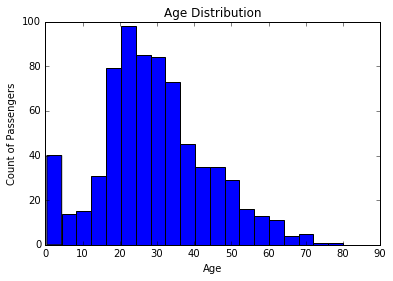

In [30]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins = 20, range = (df['Age'].min(),df['Age'].max()))
plt.pyplot.title('Age Distribution')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Count of Passengers')
plt.pyplot.show()


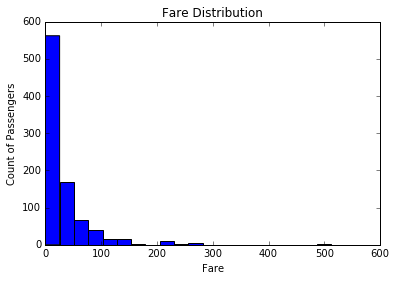

In [7]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins = 20, range = (df['Fare'].min(),df['Fare'].max()))
plt.pyplot.title('Fare Distribution')
plt.pyplot.xlabel('Fare')
plt.pyplot.ylabel('Count of Passengers')
plt.pyplot.show()


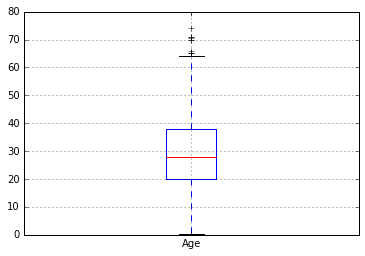

In [8]:
df.boxplot(column = 'Age', return_type = 'axes')

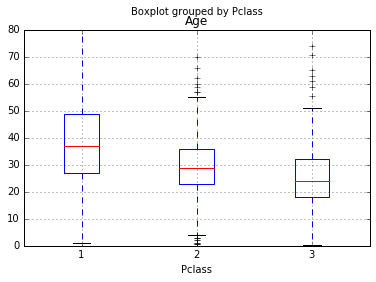

In [9]:
df.boxplot(column = 'Age', by = "Pclass")

In [14]:
# distribution of population by PClass and their probability of survival

temp1 = df.groupby('Pclass').Survived.count() # number of survivors per class ///func.something??
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count() #Survival rate per class,
#Survived.sum sums 1's indicating survived
temp3 = df.groupby('Pclass').Survived.sum()

print(temp1)
print(temp2)
print(temp3)

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


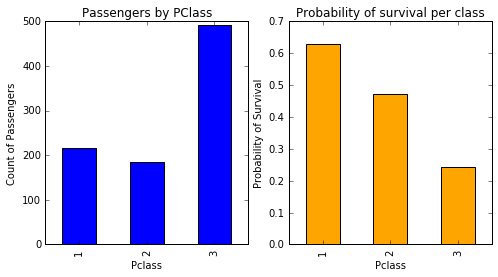

In [16]:
fig = plt.pyplot.figure(figsize=(8,4)) #why canvass is like this? figsize = (8,4)

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title('Passengers by PClass')
temp1.plot(kind = 'bar') #?native plotting to plot temp1, num of survivors per class

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar', color = ['orange'])
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title('Probability of survival per class')




In [17]:
temp3 = pd.crosstab([df.Pclass, df.Sex, df.Embarked], df.Survived.astype(bool)) #Crosstabbing like a Pivot table in Excel
temp3

#Note how to cross tab

Survived                False  True 
Pclass Sex    Embarked              
1      female C             1     42
              Q             0      1
              S             2     46
       male   C            25     17
              Q             1      0
              S            51     28
2      female C             0      7
              Q             0      2
              S             6     61
       male   C             8      2
              Q             1      0
              S            82     15
3      female C             8     15
              Q             9     24
              S            55     33
       male   C            33     10
              Q            36      3
              S           231     34

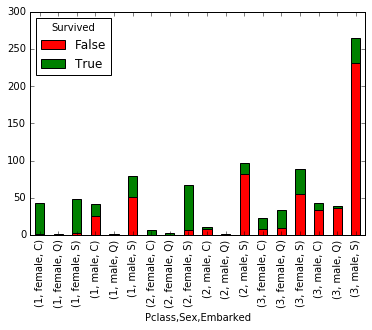

In [18]:
temp3.plot(kind = 'bar', stacked = True, color = ['red', 'green'], grid = False)

In [19]:
sum(df['Cabin'].isnull()) #see how many null in Cabin Feature

687

In [20]:
#so there are 687 missing values for Cabin
df = df.drop(['Ticket', 'Cabin'], axis =1) #if you run this again, there will be error



In [21]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,C


In [22]:
#now we replace Missing AGes, below by mean

meanAge = np.mean(df.Age) #USe NUMPY to determine mean Age
df.Age = df.Age.fillna(meanAge) # i.e. fill those NA with mean Age 

In [23]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,C


In [24]:
#ito na, we will build a supervised model!!
# first we need to extract salutations in name

def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()  # takes a word, split it by comma then split it by dot rem wytspace by strp


In [25]:
#apply above function to entire column using apply() and make new Dataframe

df2 = pd.DataFrame({'Salutation':df['Name'].apply(name_extract)}) 

# make a new dtaa frame with Salutation as header and yung values sa name na inapplyan ng name_extract as values
#DIctionary is used!
df2.head(5)


,Salutation
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [26]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S


In [27]:
df = pd.merge(df,df2, left_index = True, right_index = True) #merges on index? what is right and left index?
temp1 = df.groupby('Salutation').PassengerId.count() #temp1 groupby, i.e arrange per salutation, then count for each
print (temp1)

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: PassengerId, dtype: int64


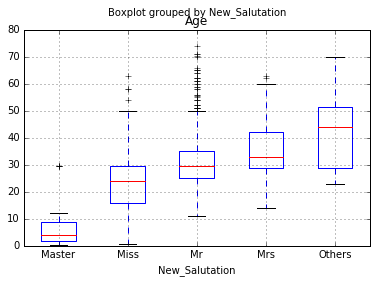

In [28]:
# next we need to gather other salutations to one class, see that the major are: Master, Miss, Mr, Mrs

def group_salutation(old_salutation):
    if old_salutation == 'Mr':
        return('Mr')
    elif old_salutation == 'Miss':
        return('Miss')
    elif old_salutation == 'Mrs':
        return('Mrs')
    elif old_salutation == 'Master':
        return('Master')
    else:
        return('Others')
    
df3 = pd.DataFrame({'New_Salutation': df['Salutation'].apply(group_salutation)}) #define new data frame
# dictionary is used {Header: contents}, here the contents is actually a list , pababang vector

df = pd.merge(df, df3, left_index = True, right_index = True)
df.head(10)


df.boxplot(column = 'Age', by = 'New_Salutation')



In [59]:
temp1 = pd.crosstab([df.New_Salutation],df.New_Salutation.count()) #view table per salutation and their count
temp1


col_0,891
New_Salutation,
Master,40
Miss,182
Mr,517
Mrs,125
Others,27


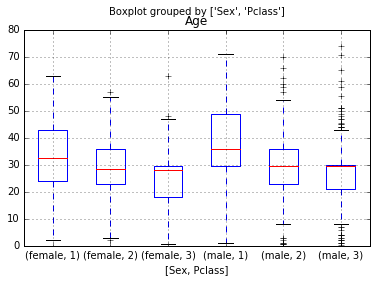

In [31]:
df.boxplot(column = 'Age', by = ['Sex','Pclass'])

In [63]:
table = df.pivot_table(values = 'Age', index = ['New_Salutation'], columns = ['Pclass', 'Sex'],aggfunc = np.median)


In [64]:
table #this shows a table where we will get values for imputation

Pclass              1           2                3           
Sex            female male female  male     female       male
New_Salutation                                               
Master            NaN    4    NaN   1.0        NaN   6.500000
Miss             30.0  NaN     24   NaN  22.000000        NaN
Mr                NaN   36    NaN  30.0        NaN  29.699118
Mrs              38.5  NaN     32   NaN  29.699118        NaN
Others           28.5   47     28  46.5        NaN        NaN

In [65]:
#this function returns the value in the table for a specific set of attrib, multi-faceted lookup

def fage(x):
    return table[x['Pclass']][x['Sex']][x['New_Salutation']]



#df['Age'].fillna(df[df['Age'].isnull()].apply(fage, axis=1), inplace=True)

In [62]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,New_Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr,Mr


df[df['Age'].isnull()] this part of the code does not return the values,

I think we need to replace this such that return the lines where Age is null